In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (8, 4)
import warnings
warnings.filterwarnings('ignore')

### **Load Data and Basic EDA**

In [2]:
df = pd.read_csv('Sleep_Efficiency.csv')
df.head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


In [3]:
df.shape

(452, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      452 non-null    int64  
 1   Age                     452 non-null    int64  
 2   Gender                  452 non-null    object 
 3   Bedtime                 452 non-null    object 
 4   Wakeup time             452 non-null    object 
 5   Sleep duration          452 non-null    float64
 6   Sleep efficiency        452 non-null    float64
 7   REM sleep percentage    452 non-null    int64  
 8   Deep sleep percentage   452 non-null    int64  
 9   Light sleep percentage  452 non-null    int64  
 10  Awakenings              432 non-null    float64
 11  Caffeine consumption    427 non-null    float64
 12  Alcohol consumption     438 non-null    float64
 13  Smoking status          452 non-null    object 
 14  Exercise frequency      446 non-null    fl

In [5]:
df.isnull().sum()

ID                         0
Age                        0
Gender                     0
Bedtime                    0
Wakeup time                0
Sleep duration             0
Sleep efficiency           0
REM sleep percentage       0
Deep sleep percentage      0
Light sleep percentage     0
Awakenings                20
Caffeine consumption      25
Alcohol consumption       14
Smoking status             0
Exercise frequency         6
dtype: int64

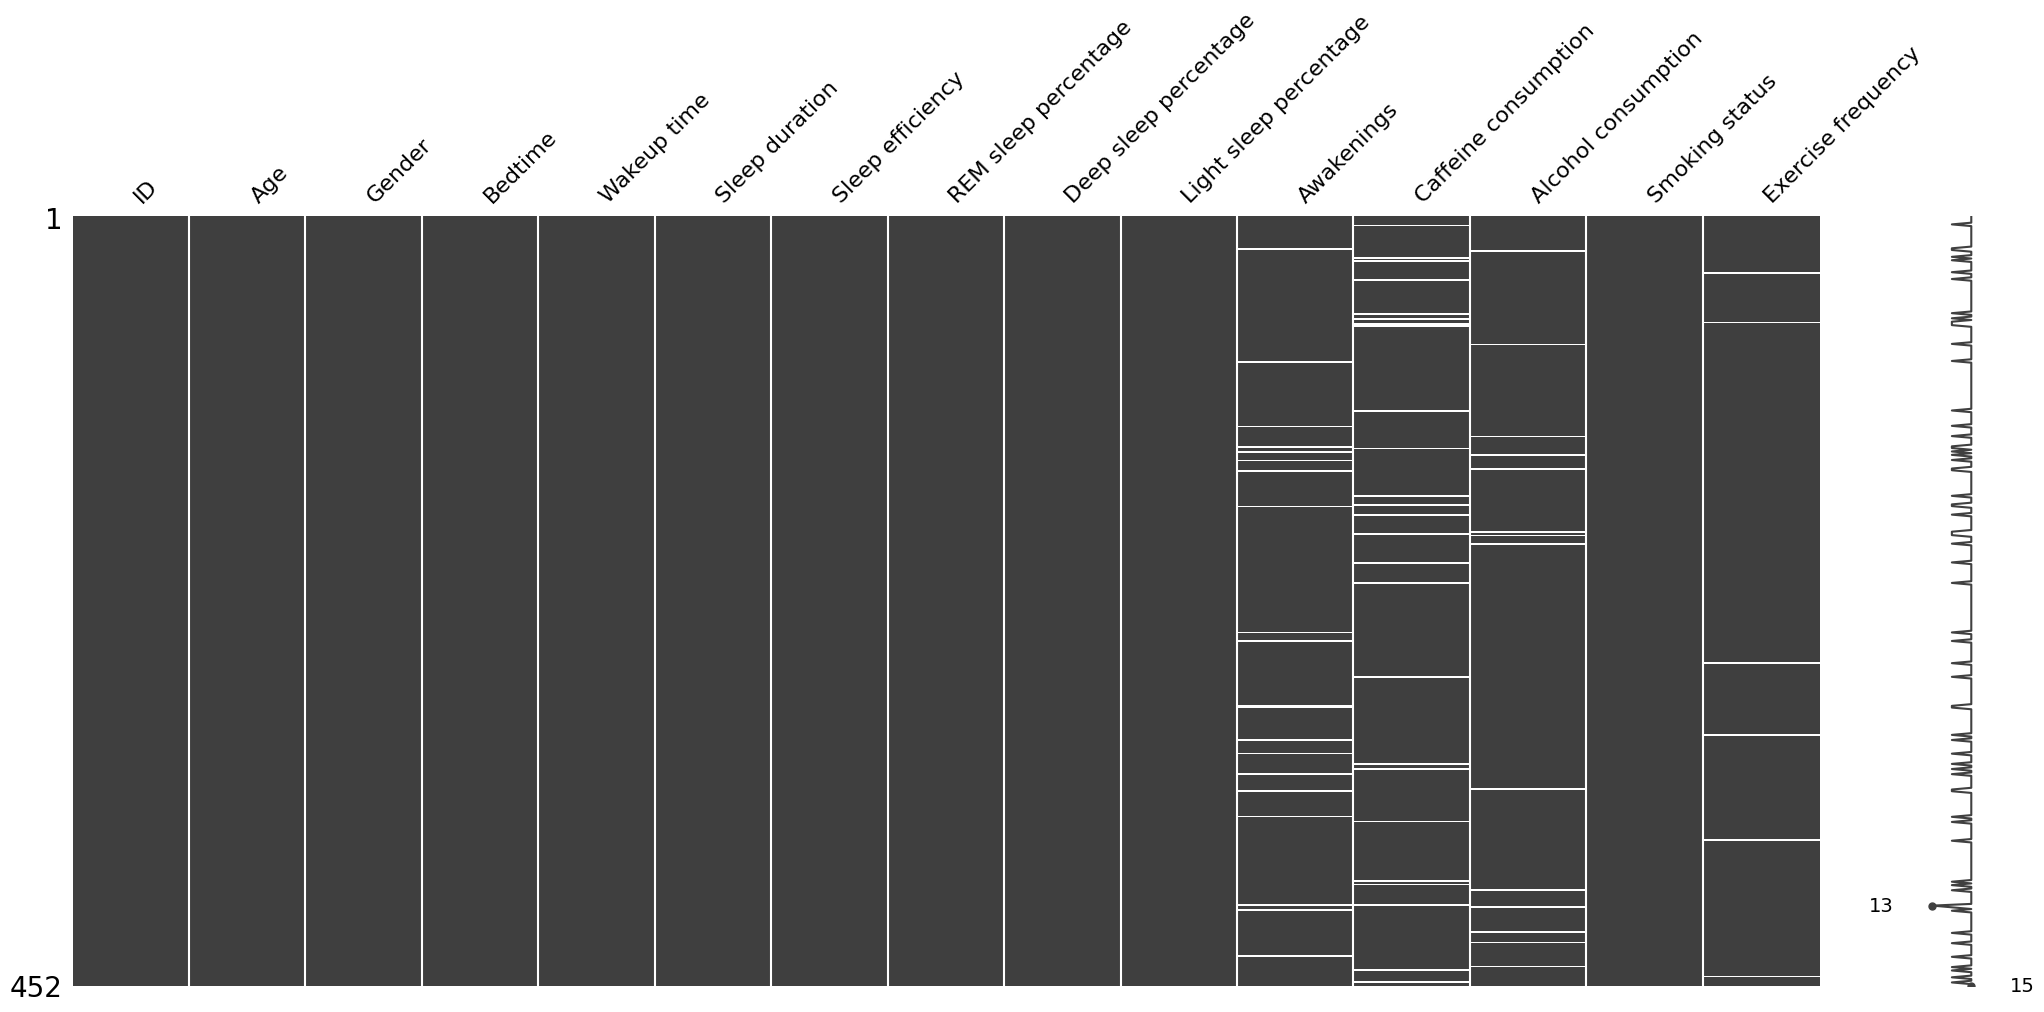

In [6]:
import missingno as msno
msno.matrix(df);

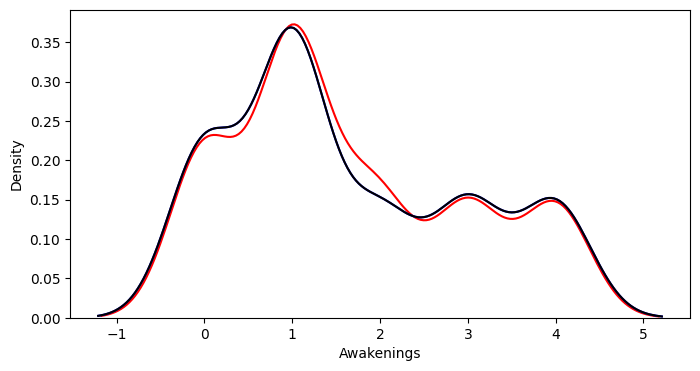

In [7]:
a = df.Awakenings.fillna(df.Awakenings.mean())
b = df.Awakenings.fillna(df.Awakenings.mode())
sns.kdeplot(a,color='red')
sns.kdeplot(b, color='blue')
sns.kdeplot(df.Awakenings, color='black');

In [8]:
df.Awakenings = df.Awakenings.fillna(df.Awakenings.mean())

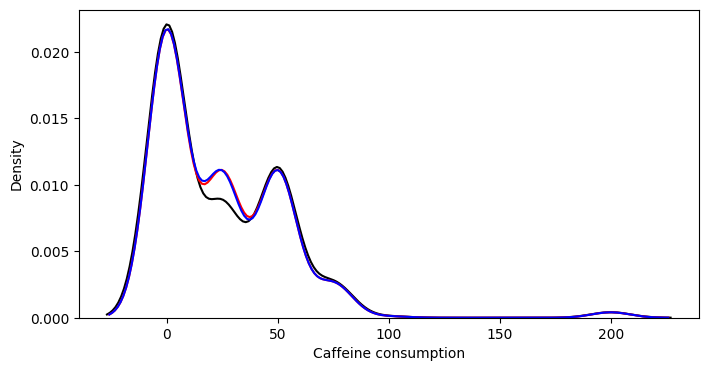

In [9]:
a = df['Caffeine consumption'].fillna(df['Caffeine consumption'].median())
b = df['Caffeine consumption'].fillna(df['Caffeine consumption'].mean())
sns.kdeplot(df['Caffeine consumption'], color='black');
sns.kdeplot(a, color='red');
sns.kdeplot(b, color='blue');

In [10]:
df['Caffeine consumption'] = df['Caffeine consumption'].fillna(df['Caffeine consumption'].median())

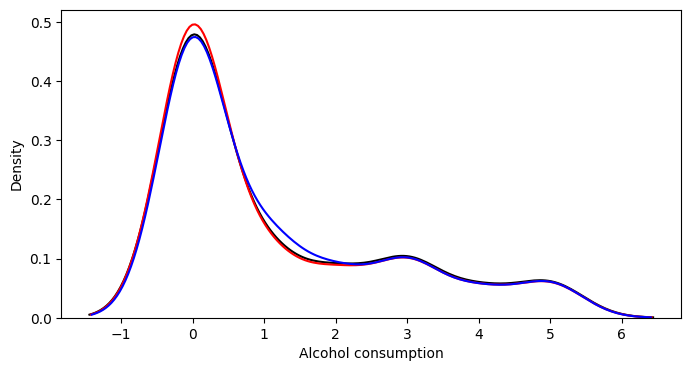

In [11]:

a = df['Alcohol consumption'].fillna(df['Alcohol consumption'].median())
b = df['Alcohol consumption'].fillna(df['Alcohol consumption'].mean())
sns.kdeplot(df['Alcohol consumption'], color='black');
sns.kdeplot(a, color='red');
sns.kdeplot(b, color='blue');

In [12]:
df['Alcohol consumption'] = df['Alcohol consumption'].fillna(df['Alcohol consumption'].median())

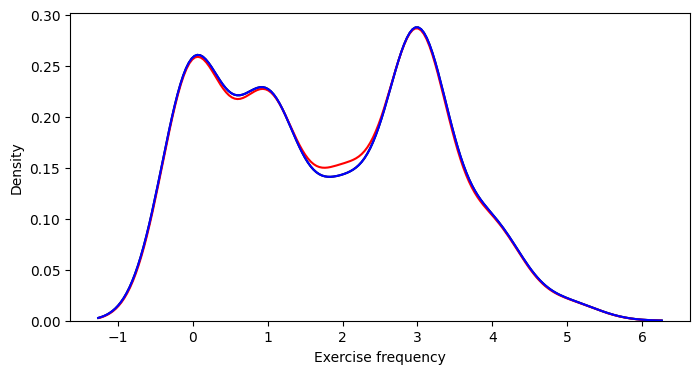

In [13]:

a = df['Exercise frequency'].fillna(df['Exercise frequency'].median())
b = df['Exercise frequency'].fillna(df['Exercise frequency'].mode())
sns.kdeplot(df['Exercise frequency'], color='black');
sns.kdeplot(a, color='red');
sns.kdeplot(b, color='blue');

In [14]:
df['Exercise frequency'] = df['Exercise frequency'].fillna(df['Exercise frequency'].median())

In [15]:
df.isnull().sum()

ID                        0
Age                       0
Gender                    0
Bedtime                   0
Wakeup time               0
Sleep duration            0
Sleep efficiency          0
REM sleep percentage      0
Deep sleep percentage     0
Light sleep percentage    0
Awakenings                0
Caffeine consumption      0
Alcohol consumption       0
Smoking status            0
Exercise frequency        0
dtype: int64

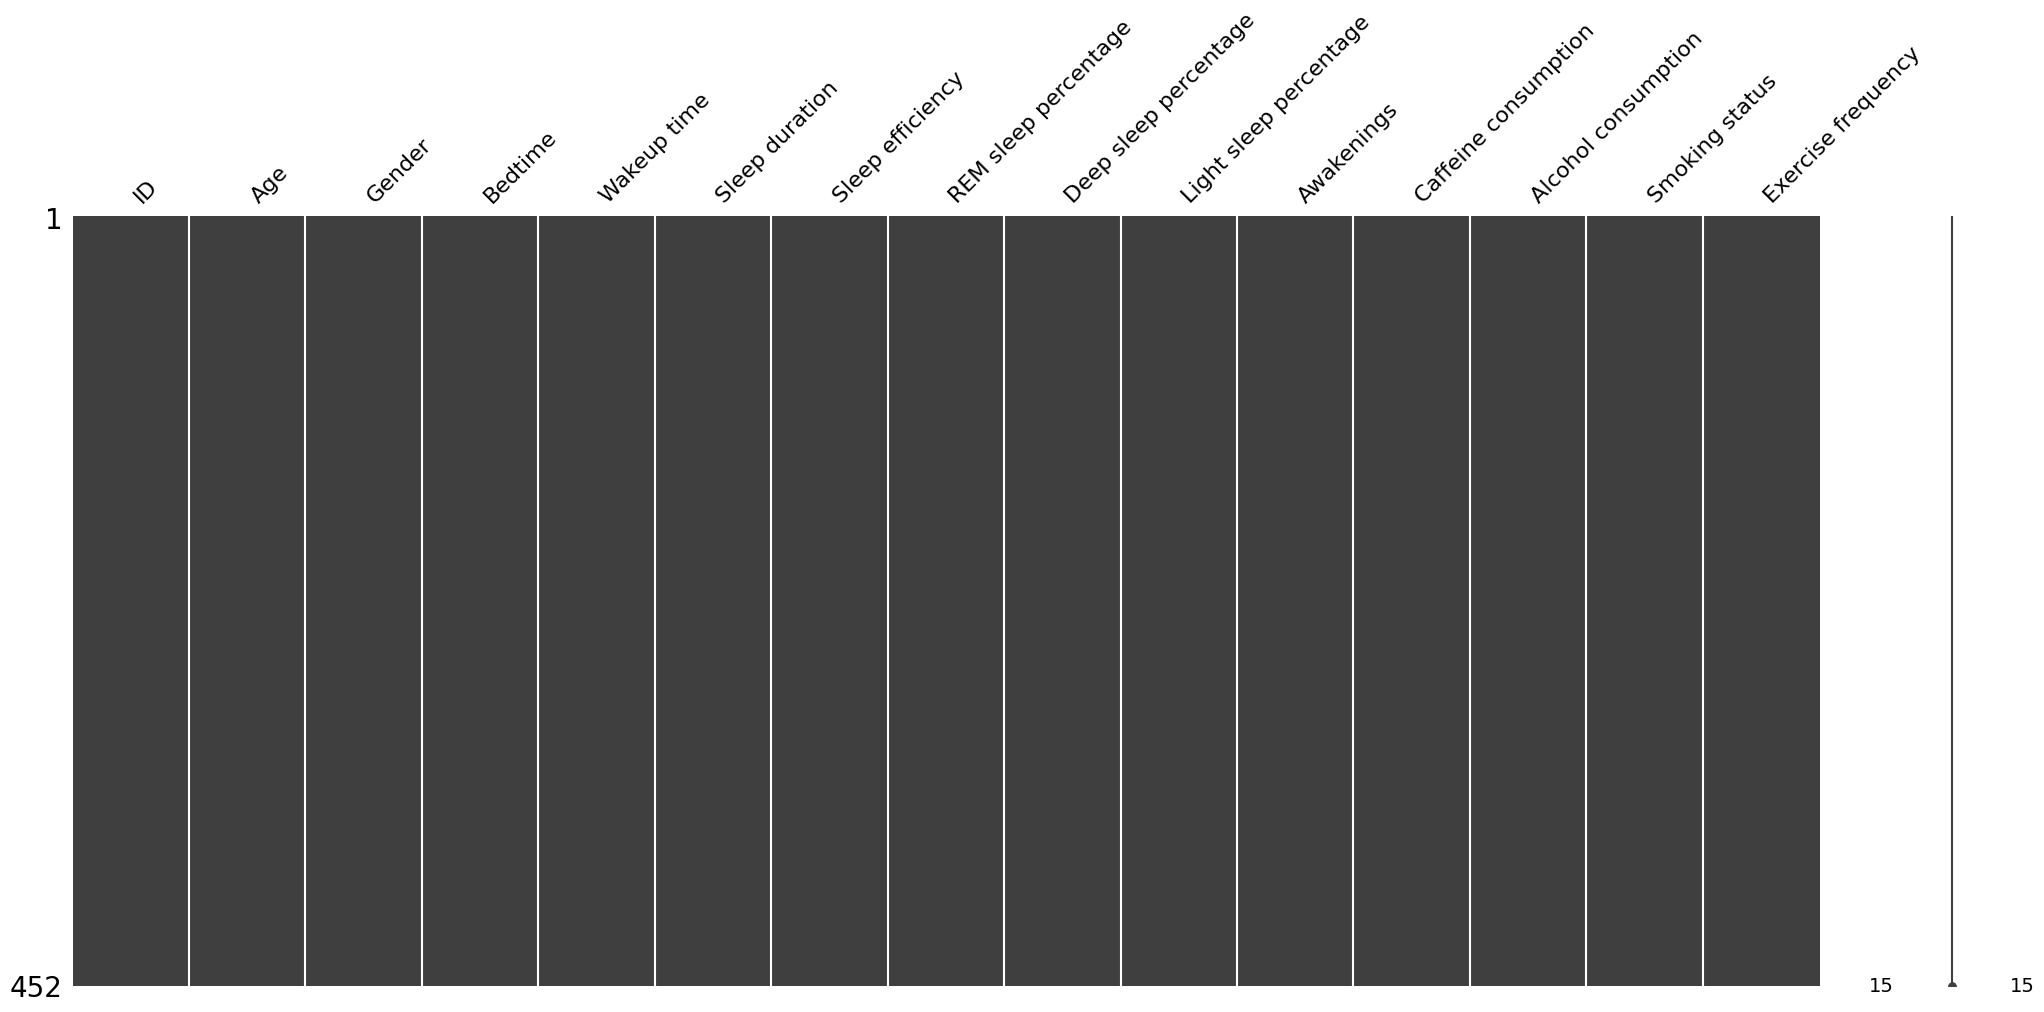

In [16]:
import missingno as msno
msno.matrix(df);

In [17]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,452.0,NaN,NaN,NaN,226.5,130.625419,1.0,113.75,226.5,339.25,452.0
Age,452.0,NaN,NaN,NaN,40.285398,13.17225,9.0,29.0,40.0,52.0,69.0
Gender,452,2,Male,228,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bedtime,452,424,2021-03-11 01:00:00,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Wakeup time,452,434,2021-11-25 06:00:00,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sleep duration,452.0,NaN,NaN,NaN,7.465708,0.866625,5.0,7.0,7.5,8.0,10.0
Sleep efficiency,452.0,NaN,NaN,NaN,0.788916,0.135237,0.5,0.6975,0.82,0.9,0.99
REM sleep percentage,452.0,NaN,NaN,NaN,22.615044,3.525963,15.0,20.0,22.0,25.0,30.0
Deep sleep percentage,452.0,NaN,NaN,NaN,52.823009,15.654235,18.0,48.25,58.0,63.0,75.0
Light sleep percentage,452.0,NaN,NaN,NaN,24.561947,15.313665,7.0,15.0,18.0,32.5,63.0


In [18]:
from sklearn.preprocessing import LabelEncoder
LE= LabelEncoder()
df['Gender'] = LE.fit_transform(df['Gender'])
df['Smoking status'] = LE.fit_transform(df['Smoking status'])

### **Data Transformation & Scaling**

In [19]:
df.drop(['ID', 'Bedtime', 'Wakeup time'], axis=1, inplace=True)

In [20]:
corr = df.corr(numeric_only=True)
corr

,Age,Gender,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
Age,1.000000,0.244468,-0.062462,0.098357,0.042091,0.021730,-0.031905,-0.017468,-0.169223,0.052238,0.031237,0.070775
Gender,0.244468,1.000000,-0.044376,0.010062,-0.161102,0.075939,-0.040534,0.074205,-0.242949,0.051557,0.143020,0.230770
Sleep duration,-0.062462,-0.044376,1.000000,-0.027467,-0.015940,-0.037304,0.041804,0.004829,-0.014792,-0.044325,0.004211,-0.067064
Sleep efficiency,0.098357,0.010062,-0.027467,1.000000,0.062362,0.787335,-0.819204,-0.554498,0.062904,-0.381249,-0.290026,0.257688
REM sleep percentage,0.042091,-0.161102,-0.015940,0.062362,1.000000,-0.208159,-0.017462,-0.024992,0.057917,-0.047344,0.032184,0.029341
Deep sleep percentage,0.021730,0.075939,-0.037304,0.787335,-0.208159,1.000000,-0.974311,-0.300301,0.001439,-0.355925,-0.226802,0.179152
Light sleep percentage,-0.031905,-0.040534,0.041804,-0.819204,-0.017462,-0.974311,1.000000,0.312734,-0.014806,0.374742,0.224436,-0.189892
Awakenings,-0.017468,0.074205,0.004829,-0.554498,-0.024992,-0.300301,0.312734,1.000000,-0.103486,0.195649,-0.020781,-0.211435
Caffeine consumption,-0.169223,-0.242949,-0.014792,0.062904,0.057917,0.001439,-0.014806,-0.103486,1.000000,-0.118356,0.007308,-0.062197
Alcohol consumption,0.052238,0.051557,-0.044325,-0.381249,-0.047344,-0.355925,0.374742,0.195649,-0.118356,1.000000,0.072253,-0.004122


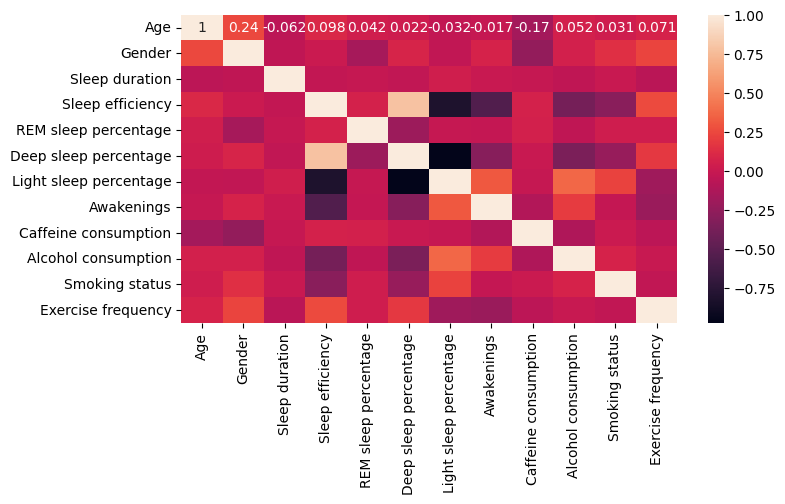

In [21]:
sns.heatmap(corr, annot = True);
#sns.heatmap(df.corr(), annot=True, cmap='viridis', annot_kws={"size":.8})

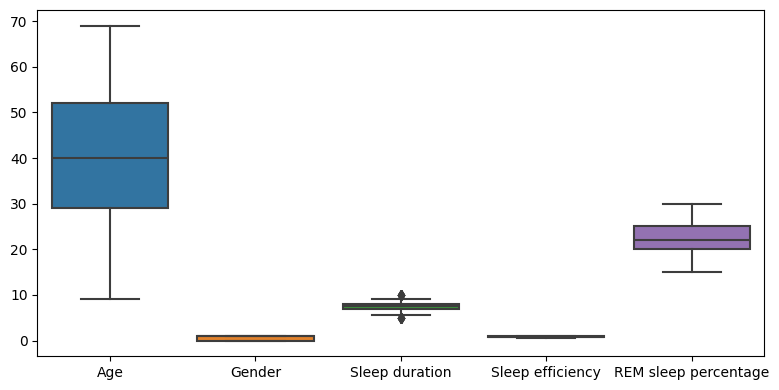

In [22]:
sns.boxplot(df.iloc[:,0:5]);
plt.tight_layout()

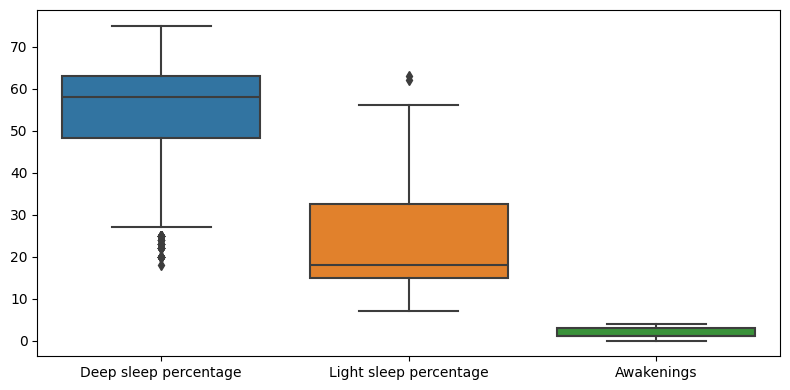

In [23]:
sns.boxplot(df.iloc[:,5:8]);
plt.tight_layout()

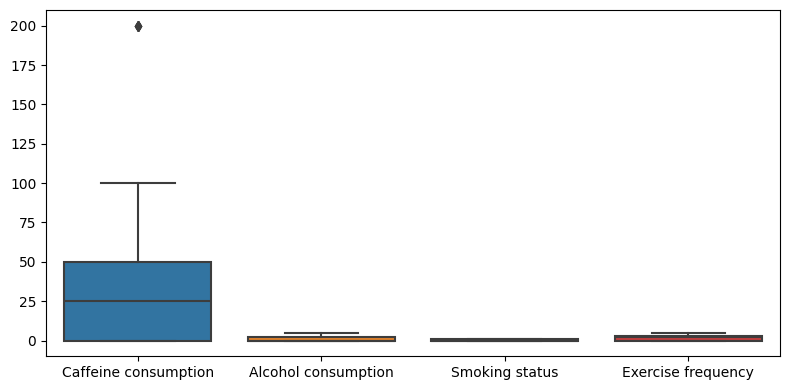

In [24]:
sns.boxplot(df.iloc[:,8:]);
plt.tight_layout()

In [25]:
from summarytools import dfSummary
dfSummary(df, is_collapsible=True)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Age[int64],Mean (sd) : 40.3 (13.2)min < med < max:9.0 < 40.0 < 69.0IQR (CV) : 23.0 (3.1),61 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8g+/7EAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACyElEQVR4nO3dQY7aMBSA4ecyoABSEEKCHReo1AVLDtHD9ghdcAJuwA4JoSDSiQgh3VRVR5oCseOJn+f/9qFZ/PI4tRObuq4FCN2Xrm8AeMZL1zfgizFmKCIDh5+41HX92tb9wE2UoRpjhrPZ7HuaplPb3zidTkdjzA9iDUOUoYrIIE3T6Xq9fp1MJkXTi7MsSzabzfRwOAxEhFADEGuoIiIymUyK+Xz+y/LyYas380EcpzzBTneiDvWzcZ3yhDzdIdS4WE95Qp/uEGqEHKY8wU53+H9UqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFAh6CVUh51A6e1267d9P8+KdQdTl4IN1WUnUFmWSVVVX4ui+Ckittv8rMS8g6lLwYYqDjuBdrvddLvdjq7Xa8/Xzd0R7Q6mLoUcqojY7QQ6Ho+d7wKKcQdTl4IP9bOpqqovIqkxxubyTufmPhFqQPI875dl+W25XPZ6vV7jd726nJv7Rqj/4TCyWY9ql8vlJUmS0Wq1KhaLxbHp9R3Pzb0i1He4jGxtjGrj8dhqfhvC3NwXQn2Hy8gW86jWJUK9w2Zki3lU6xJLqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVGA/Kv5yfLFQxOPHMwgVIuL+YqGI349nECpExP3FQt8fzyBUvGH7YuEf3l7D4WEKKhAqVCBUqECoUIFQoQJP/WiN44LB3cUCQkUrXBcMHi0WECpa4bJg8MxiAaGiVQ4LBncXC3iYggqEChW8/ul3PG8p2u/RozlvobqetxTz9+jRnM8R1fq8JRG+3Iy3vD/12563xJeb8S8epqDCwxFV68G5iMvdULUenIv4PBpRtR6ci8g89TCl9eBcxIOHKajw1IiaZVnS9IfP53MiIpLnebLf70cfeb3Wf1vrfbte/0xfvwHhsrLtLORz8gAAAABJRU5ErkJggg=="">",0(0.0%)
2,Gender[int32],1. 12. 0,228 (50.4%)224 (49.6%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8g+/7EAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABN0lEQVR4nO3bwYnDMBRF0a8gwmQjYQwuxkVMsSlC3RhjLZKQjWYxDcR/8YTIPRV8zMWQ4BdaawYoBDO7mdm19yEDerfWnr2PGEmc5/k3pTT1PmQ0tdY9hHAnuM/FlNK0rusz5/zqfcwojuP4KaVM27ZdzYzYPhTNzHLOr2VZHr2PGcyt9wGjufQ+AN+D2CBDbJAhNsgQG2SIDTLEBhligwyxQYbYIENskCE2yBAbZIgNMsQGmWj2/zFg70NGwvPyibXWvZQyGR8DnlJr3c3s3fuOkTB48WPwclJgygcV3mw+vNUcmPI5MOPzYcp3EjM+P6Z8Pvxyd+BPXcgQG2SIDTLEBhligwyxQYbYIENskCE2yBAbZIgNMsQGGWKDDLFBhtggw5TvJJ6VH1M+B2Z8PgxefBi8OPwBCltq31np+ZoAAAAASUVORK5CYII="">",0(0.0%)
3,Sleep duration[float64],1. 7.02. 8.03. 7.54. 6.05. 8.56. 9.07. 10.08. 5.09. 5.5,154 (34.1%)103 (22.8%)88 (19.5%)34 (7.5%)28 (6.2%)26 (5.8%)8 (1.8%)8 (1.8%)3 (0.7%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAADPCAYAAADifqNtAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8g+/7EAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADnElEQVR4nO3dTU4bWQBG0WdkRZ2JLWSJxbCILLYX4d0ghAdNlIl70KTVdAbxT/mWZZ8zY/aQrh64VB8s9vv9gMLD3AfgfoiNjNjIiI2M2MiIjYzYyCzGGF/HGF/mPsjEfuz3+/e5D8Fny81m8221Wj3OfZAp7Xa718Vi8afgrstytVo9Pj8/v6/X6+9zH2YKb29vf2y328eXl5cvYwyxXZHlGGOs1+vvT09Pf819mAl9nfsA/MoHBDJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjLLMf55LWfug0zllr6XW7Pc7Xav2+32cdzQazm73e51jPFj7nPwmdfCySz8rQ8q13azuZFu2FUNXgxVbtvVDF4MVW7ftQ1ebuYTMb/yUJeM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI3M1QxeruEMXNZVDV4MVW6b18LJGLyQ8QGBzJw/Rv3IvDOzrassqe7PLOsqS6r7NOe6avZHLbR8QCAjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMzy7rKkuo+zbausqS6P14LJ2NdReaUm82NxEmOHrwYqnCqowYvhiqc45TBi6EKJ/FQl4zYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjcxRgxdDFc5x9ODFUIVTeS2cjMELmWNuNjcaZzl48GLowrkOGrwYujCFYwYvhi6cxUNdMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjc9C6yqqKKRy8rrKq4lw2CGSsq8gcerO51TjbQesqyyqm8Nt1lWUVUzl0XWVZxdk81CUjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiPz28GLsQtTOWjwYuzCFLwWTsbghcz/bzY3GBfzafBi2MIlPfwcvDw/P79/RHfMv4OEg/07ePn42rCFi/FQl4zYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyBz074RgCv9dV1lRcVE2CGSsq8i42chYV5GxriJjXUXGQ10yYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IeC2cjMELmZ8323CjcWnLzWbzbYwxDF24tIfVavVo6ELBczYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiI7P8WFSNYVXFhdkgkLGuIuN3NjJiIyM2MmIjIzYyYiPzNyJpq1dk4zDeAAAAAElFTkSuQmCC"">",0(0.0%)
4,Sleep efficiency[float64],Mean (sd) : 0.8 (0.1)min < med < max:0.5 < 0.8 < 1.0IQR (CV) : 0.2 (5.8),50 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMiwgaHR0cHM6Ly9tYXRwbG9

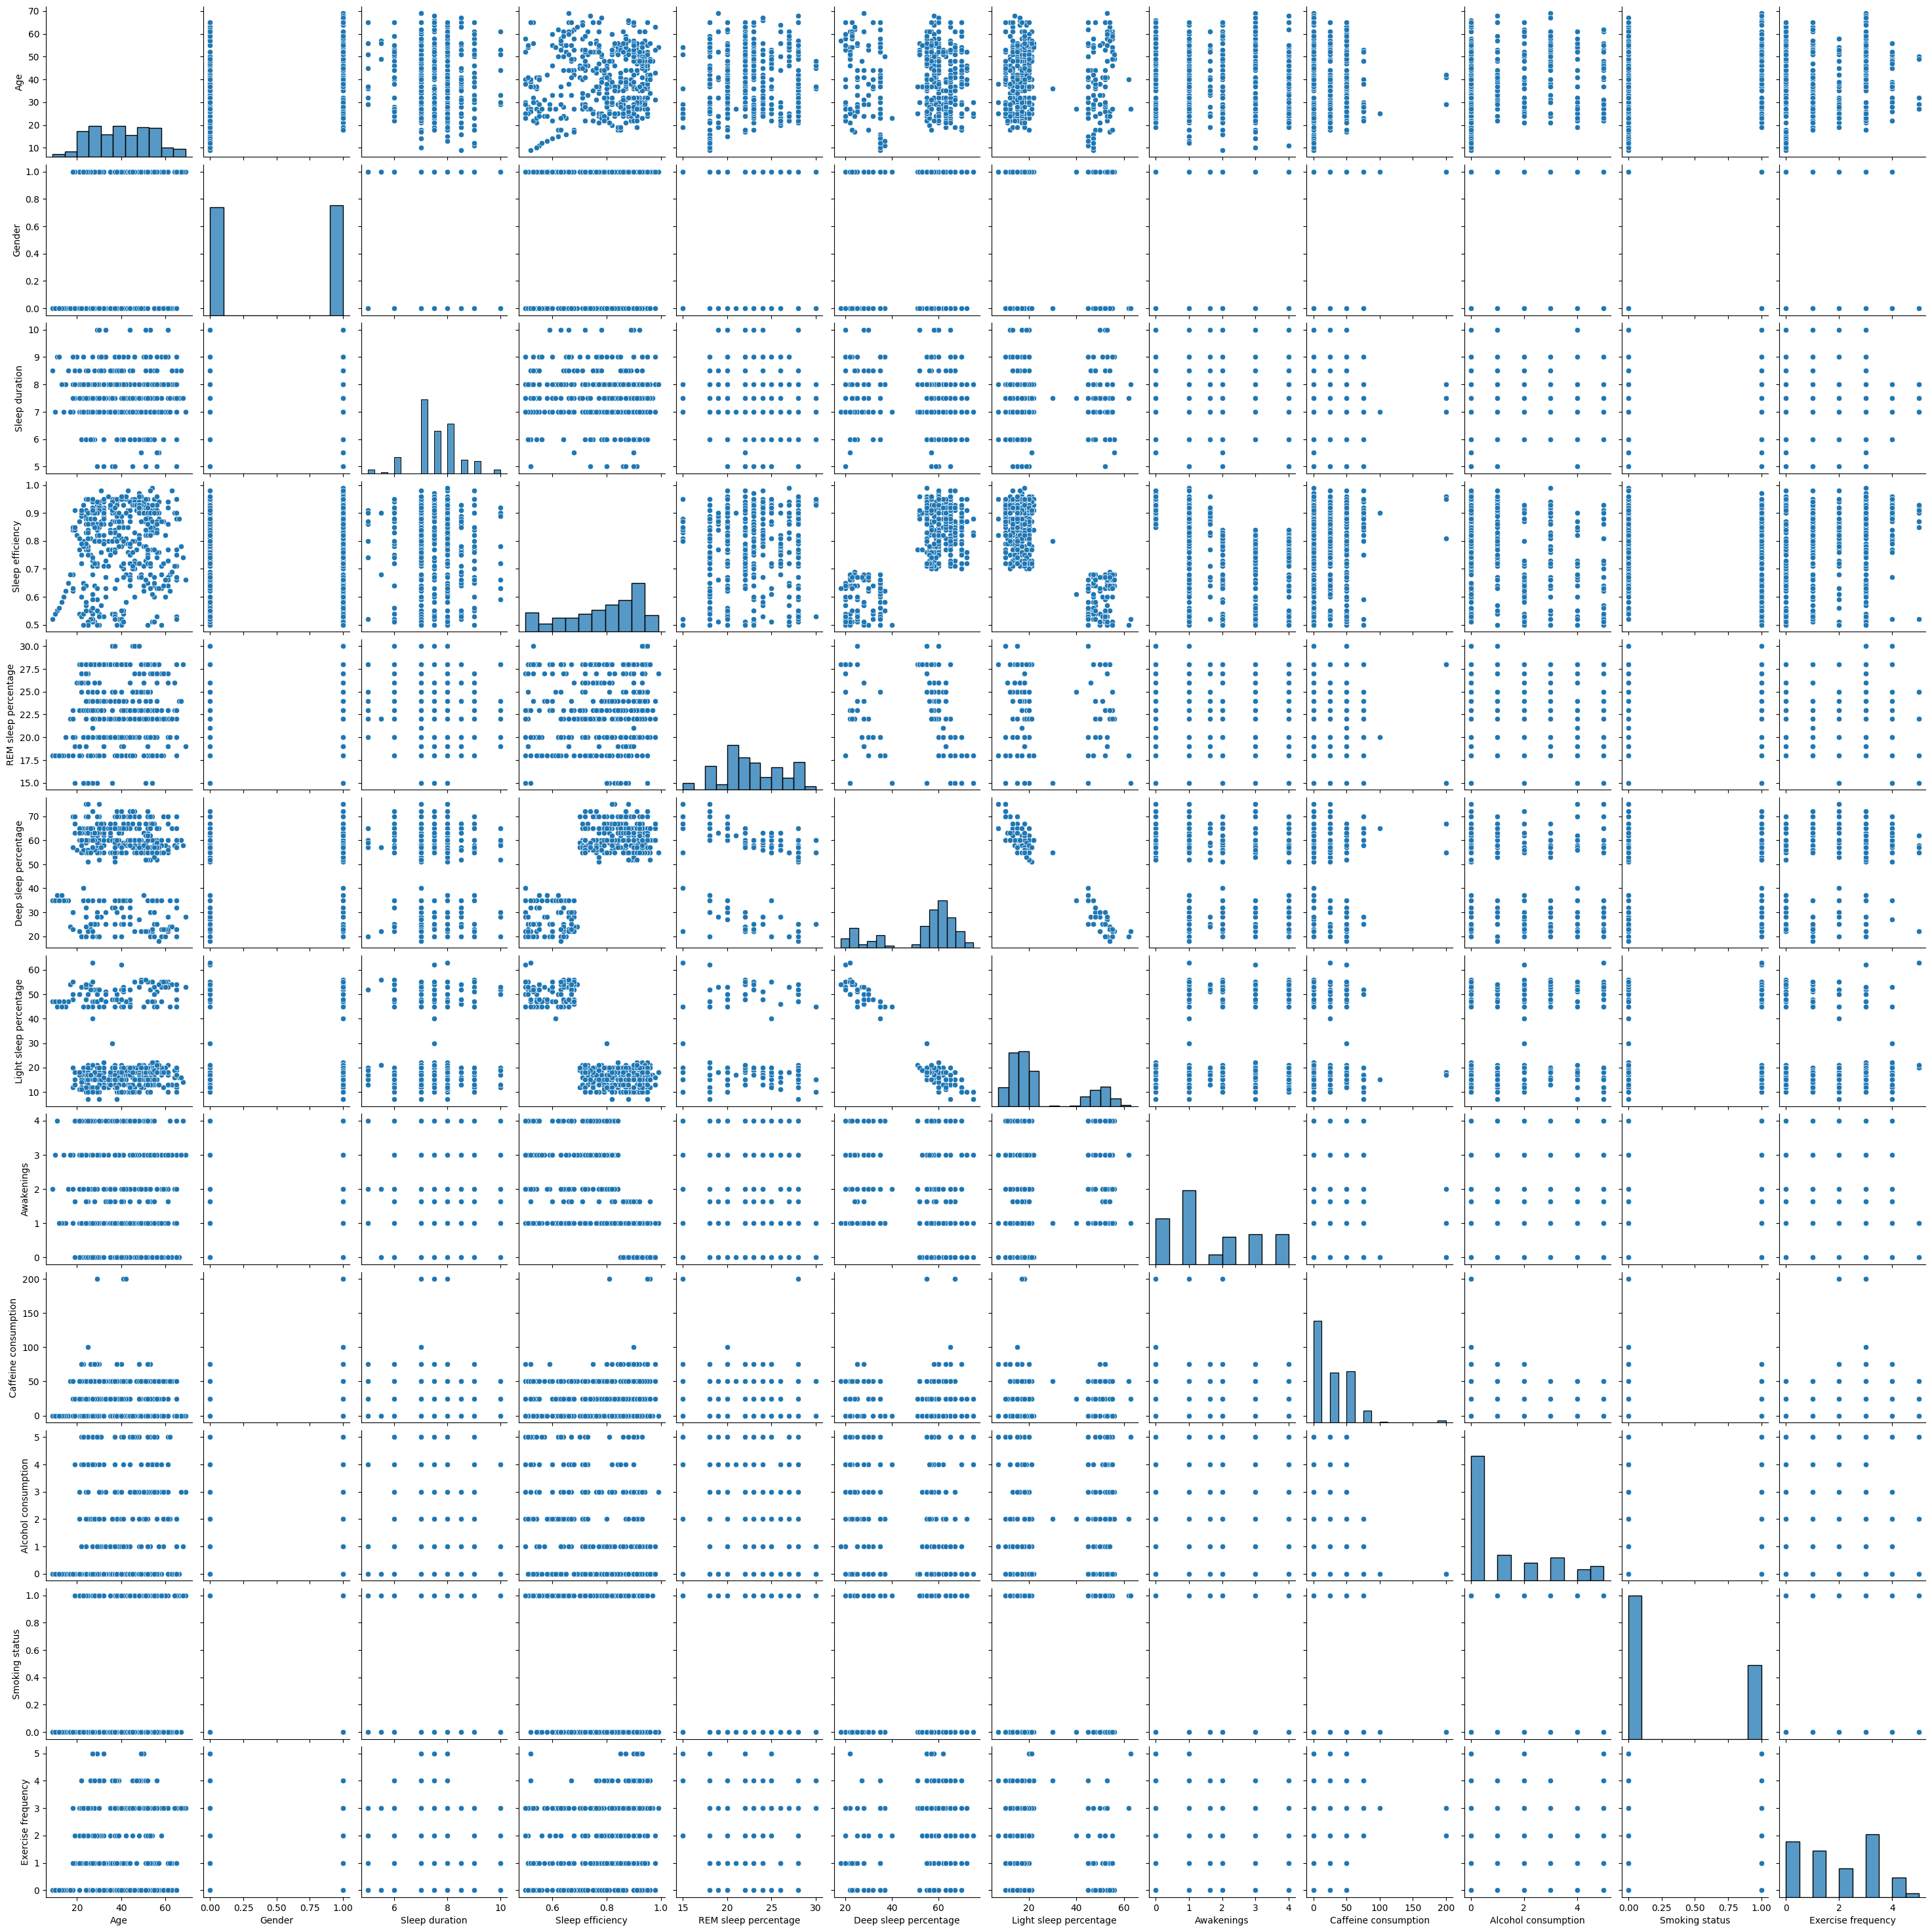

In [26]:
sns.pairplot(df);

In [27]:
X = df.drop(columns='Sleep efficiency')
y = df['Sleep efficiency']

In [28]:
from sklearn.model_selection import train_test_split   # randomly train and test set splitted

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X_train)

array([[-0.12062176,  0.96997949, -0.5773773 , ..., -0.70056948,
         1.43503381,  0.14993547],
       [-0.93800915,  0.96997949,  1.16926967, ..., -0.70056948,
        -0.69684769,  0.85287966],
       [-1.01231709,  0.96997949,  0.00483836, ...,  0.560805  ,
        -0.69684769,  0.14993547],
       ...,
       [ 1.96000068,  0.96997949,  1.16926967, ...,  1.19149224,
        -0.69684769,  0.85287966],
       [ 0.77107357,  0.96997949, -2.90623993, ..., -0.70056948,
         1.43503381,  0.85287966],
       [ 0.17661002,  0.96997949, -0.5773773 , ..., -0.70056948,
        -0.69684769, -1.25595292]])

In [31]:
X_train_scaled= scaler.transform(X_train)
X_train_scaled

array([[-0.12062176,  0.96997949, -0.5773773 , ..., -0.70056948,
         1.43503381,  0.14993547],
       [-0.93800915,  0.96997949,  1.16926967, ..., -0.70056948,
        -0.69684769,  0.85287966],
       [-1.01231709,  0.96997949,  0.00483836, ...,  0.560805  ,
        -0.69684769,  0.14993547],
       ...,
       [ 1.96000068,  0.96997949,  1.16926967, ...,  1.19149224,
        -0.69684769,  0.85287966],
       [ 0.77107357,  0.96997949, -2.90623993, ..., -0.70056948,
         1.43503381,  0.85287966],
       [ 0.17661002,  0.96997949, -0.5773773 , ..., -0.70056948,
        -0.69684769, -1.25595292]])

In [32]:
X_test_scaled= scaler.transform(X_test)
X_test_scaled

array([[ 0.54814974,  0.96997949,  0.58705401, ...,  0.560805  ,
        -0.69684769, -1.25595292],
       [ 0.17661002, -1.03094963,  0.58705401, ..., -0.70056948,
        -0.69684769, -0.55300873],
       [-1.5324727 , -1.03094963,  1.75148533, ..., -0.70056948,
        -0.69684769, -0.55300873],
       ...,
       [-0.26923765,  0.96997949,  0.58705401, ..., -0.70056948,
        -0.69684769,  0.85287966],
       [-1.23524092, -1.03094963, -0.5773773 , ..., -0.70056948,
        -0.69684769, -1.25595292],
       [-1.45816476, -1.03094963,  0.58705401, ..., -0.70056948,
        -0.69684769, -1.25595292]])

In [33]:
print("X Train features shape: {}\ny Train features shape: {}\nX Test features shape : {}\nY Test features shape : {}".format
      (X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X Train features shape: (361, 11)
y Train features shape: (361,)
X Test features shape : (91, 11)
Y Test features shape : (91,)


In [34]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [35]:
model.fit(X_train_scaled, y_train)

LinearRegression()

In [36]:
y_pred = model.predict(X_test_scaled)
y_pred

array([0.8371243 , 0.91038   , 0.74672669, 0.80343388, 0.56217978,
       0.80327188, 0.63500529, 0.8351764 , 0.74888627, 0.79733975,
       0.78220684, 0.87221405, 0.91876995, 0.61108122, 0.84081578,
       0.83895277, 0.77091376, 0.78007021, 0.72866253, 0.55891958,
       0.89165816, 0.59123317, 0.8374472 , 0.63424113, 0.87535238,
       0.84208504, 0.79076492, 0.69219694, 0.63112899, 0.83036812,
       0.85204299, 0.64260892, 0.73208901, 0.61868896, 0.83117637,
       0.87757582, 0.5487506 , 0.95088077, 0.86666079, 0.91624646,
       0.83778489, 0.52280598, 0.83671859, 0.87482857, 0.90447751,
       0.82825285, 0.78285823, 0.86132295, 0.87601677, 0.83226712,
       0.62971014, 0.88592885, 0.81958908, 0.63314729, 0.6297386 ,
       0.92871652, 0.9016927 , 0.86525537, 0.65067206, 0.86203511,
       0.55486185, 0.94232737, 0.50092298, 0.87229735, 0.66383011,
       0.93128795, 0.86841942, 0.88272597, 0.74092573, 0.88917204,
       0.96078252, 0.89573666, 0.802876  , 0.87698403, 0.74489

In [37]:
my_dict = {"actual": y_test, "prediction": y_pred, "residual":(y_test - y_pred)}

comparing = pd.DataFrame(my_dict).head(10)
comparing

,actual,prediction,residual
376,0.72,0.837124,-0.117124
242,0.85,0.910380,-0.060380
37,0.82,0.746727,0.073273
331,0.72,0.803434,-0.083434
134,0.59,0.562180,0.027820
27,0.84,0.803272,0.036728
255,0.52,0.635005,-0.115005
321,0.83,0.835176,-0.005176
89,0.77,0.748886,0.021114
59,0.80,0.797340,0.002660


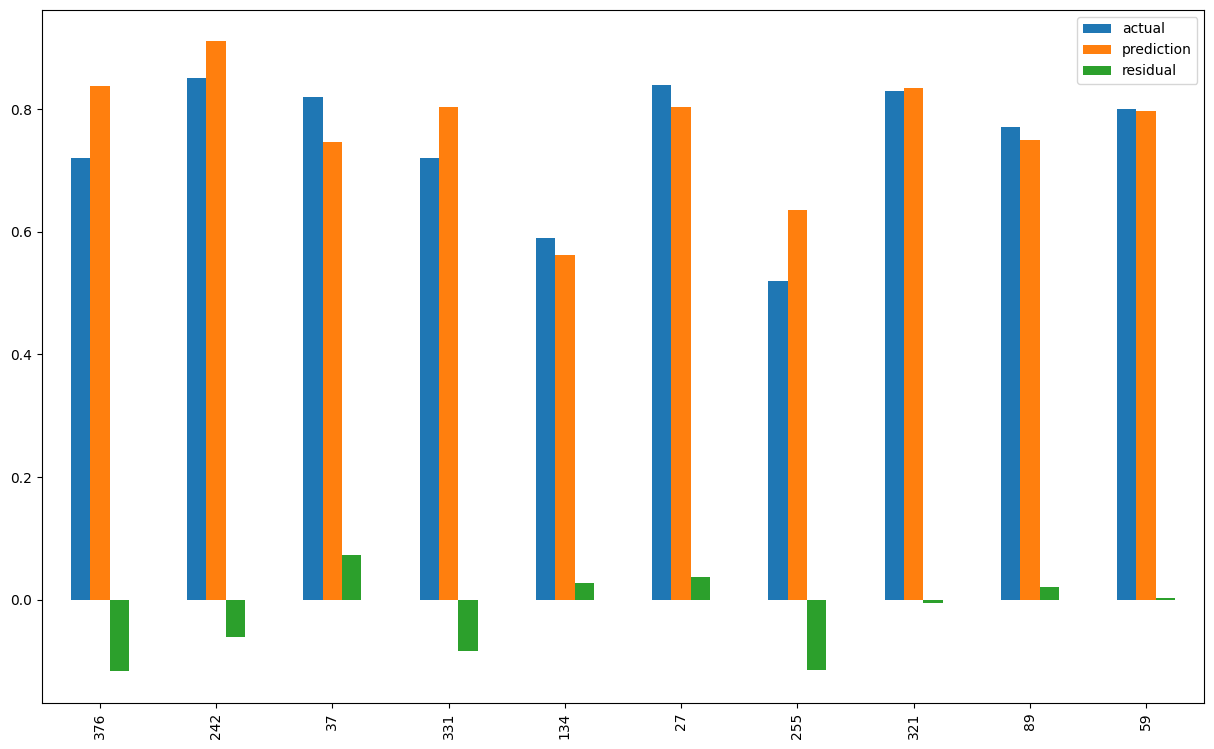

In [38]:
comparing.plot(kind= "bar", figsize = (15,9))
plt.show()

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [40]:
R2_score = r2_score(y_test, y_pred)
R2_score

0.8094351699477528

In [41]:
# MAE hesabı
mae = mean_absolute_error(y_test, y_pred)  # ne kadar dusuk o kadar basarili
mae

0.04743216931416244

In [42]:
# MSE hesabı
mse = mean_squared_error(y_test, y_pred)  # ne kadar dusuk o kadar basarili
mse

0.003606680462548077

In [43]:
# root mean squared error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred)) # ne kadar dusuk okadar iyi, hatalari daha fazla cezalandirir, outlierlara karsi cok hassas.
rmse

0.060055644718444885

In [44]:
# MAE Hata Oranı - "0' a yakın olması iyi bir tahmin modeli oldugunu gösterir"
mae / df["Sleep efficiency"].mean()

0.060123224235119954

In [45]:
# RMSE Hata Orani
rmse / df["Sleep efficiency"].mean()   # outlier a daha hassas oldugu icin mae ye gore kayip var

0.0761242643168263

In [46]:
def adj_r2(y_test, y_pred, df):
    r2 = r2_score(y_test, y_pred)    #R2 scor
    n = df.shape[0]      # number of observations gözlem
    p =df.shape[1]-1    # number of indep. variable = feature
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2

In [47]:
adj_r2(y_test, y_pred, df)

0.8046710491964466

In [48]:
# Error metricleri hesaplayan ve yazan kod blogu
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance: ")
    print("---------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [49]:
eval_metric(y_test, y_pred)

Model testing performance: 
---------------------------
R2_score 	: 0.8094351699477528
MAE 		: 0.04743216931416244
MSE 		: 0.003606680462548077
RMSE 		: 0.060055644718444885


In [50]:
residuals = y_test - y_pred

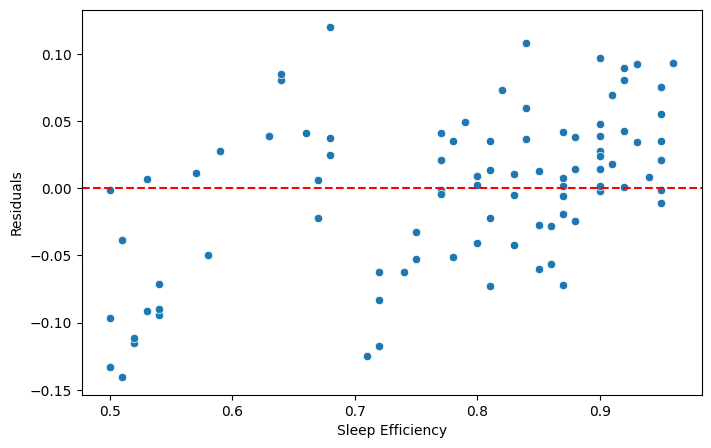

In [51]:
plt.figure(figsize=(8, 5))

sns.scatterplot(x=y_test, y=residuals)
plt.xlabel("Sleep Efficiency")
plt.ylabel("Residuals")
plt.axhline(y=0, color = "r", linestyle = "--")
plt.show()

((array([-2.4281484 , -2.08764028, -1.89028004, -1.74715337, -1.63284805,
         -1.53660047, -1.45279241, -1.37810258, -1.3103962 , -1.24821574,
         -1.19051947, -1.13653554, -1.08567519, -1.03747843, -0.99157854,
         -0.94767804, -0.90553202, -0.86493617, -0.82571806, -0.78773066,
         -0.75084742, -0.71495847, -0.67996768, -0.64579034, -0.61235128,
         -0.5795834 , -0.54742642, -0.51582587, -0.4847323 , -0.45410053,
         -0.4238891 , -0.39405977, -0.36457707, -0.33540797, -0.30652155,
         -0.27788871, -0.24948193, -0.2212751 , -0.19324327, -0.16536249,
         -0.13760969, -0.1099625 , -0.08239912, -0.05489821, -0.02743877,
          0.        ,  0.02743877,  0.05489821,  0.08239912,  0.1099625 ,
          0.13760969,  0.16536249,  0.19324327,  0.2212751 ,  0.24948193,
          0.27788871,  0.30652155,  0.33540797,  0.36457707,  0.39405977,
          0.4238891 ,  0.45410053,  0.4847323 ,  0.51582587,  0.54742642,
          0.5795834 ,  0.61235128,  0.

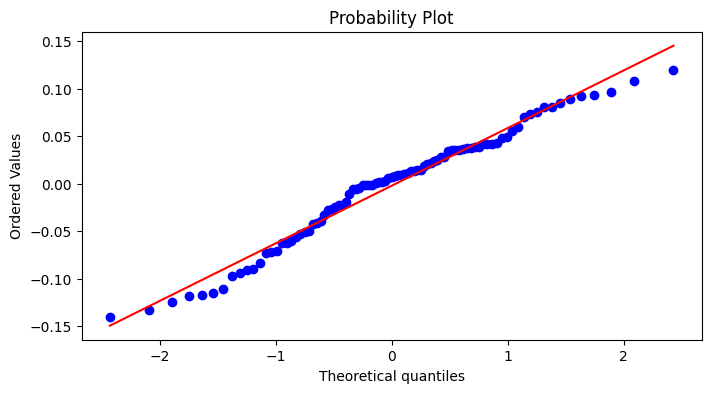

In [52]:
import scipy.stats as stats
stats.probplot(residuals, dist="norm", plot=plt)

In [53]:
from yellowbrick.regressor import ResidualsPlot, PredictionError

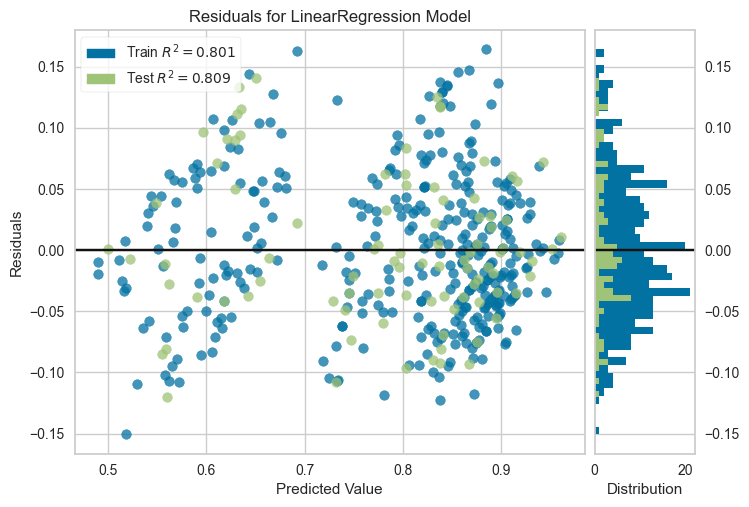

In [54]:
# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train_scaled, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)  # Evaluate the model on the test data
visualizer.show() ;                # Finalize and render the figure

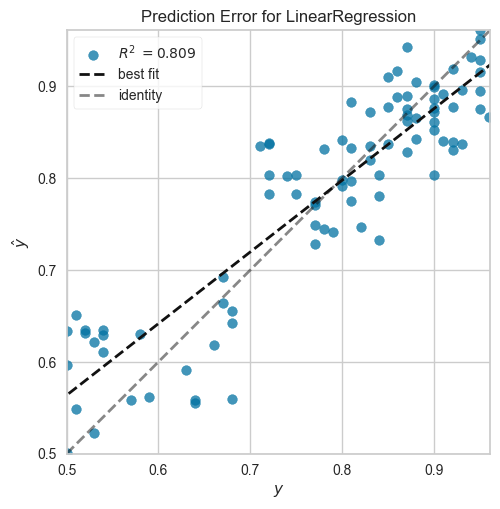

In [55]:
model = LinearRegression()
visualizer = PredictionError(model)

visualizer.fit(X_train_scaled, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)  # Evaluate the model on the test data
visualizer.show();                 # Finalize and render the figure

## **Polynomial Regression**

In [56]:
from sklearn.preprocessing import PolynomialFeatures

In [57]:
poly_conv = PolynomialFeatures(degree=2, include_bias=False)

In [58]:
poly_features = poly_conv.fit_transform(X)
poly_features.shape

(452, 77)

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.2, random_state=19)

In [61]:
model_poly = LinearRegression()

In [62]:
model_poly.fit(X_train_scaled, y_train)

LinearRegression()

In [63]:
y_pred = model_poly.predict(X_test_scaled)

In [64]:
my_dict = {"Actual":y_test, "pred":y_pred, "residual": y_test - y_pred }
compare = pd.DataFrame(my_dict)
compare.head(20)

,Actual,pred,residual
376,0.72,0.837124,-0.117124
242,0.85,0.910380,-0.060380
37,0.82,0.746727,0.073273
331,0.72,0.803434,-0.083434
134,0.59,0.562180,0.027820
27,0.84,0.803272,0.036728
255,0.52,0.635005,-0.115005
321,0.83,0.835176,-0.005176
89,0.77,0.748886,0.021114
59,0.80,0.797340,0.002660


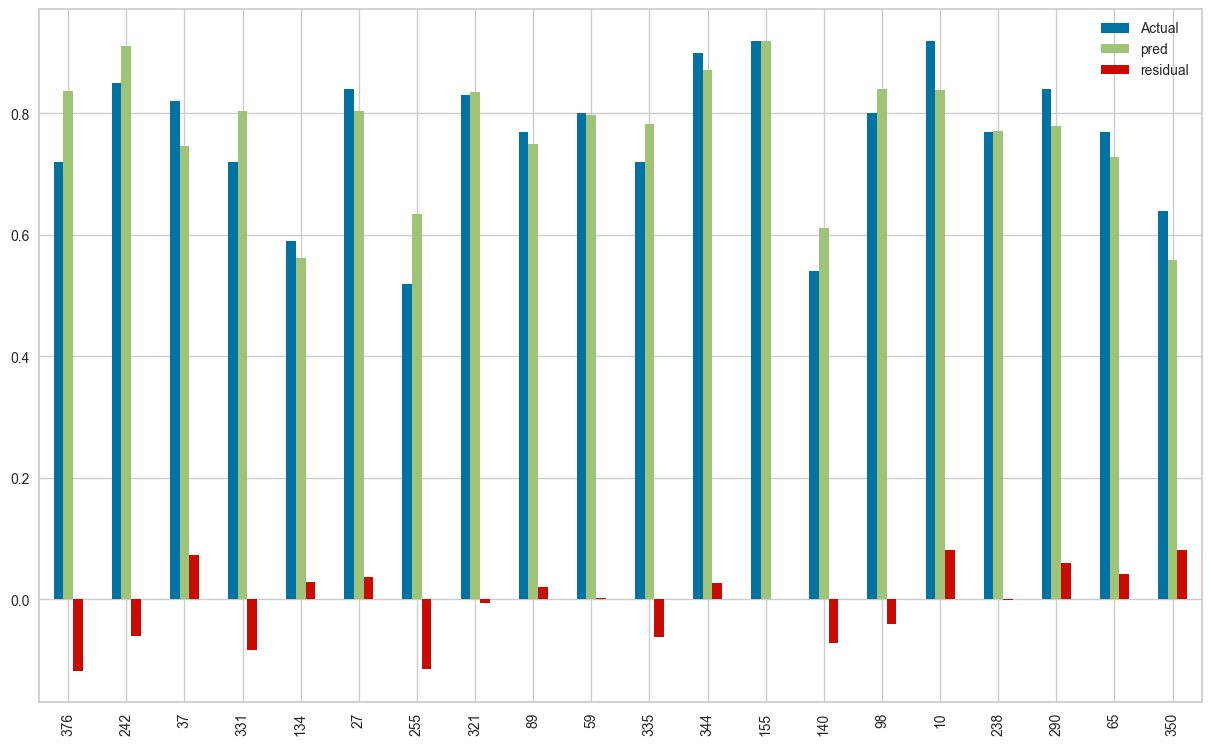

In [65]:
compare.head(20).plot(kind ="bar", figsize =(15,9))
plt.show();

In [66]:
model_poly.coef_

array([ 0.00969143,  0.00306526,  0.0004128 ,  0.01478588,  0.04112484,
       -0.04533509, -0.04702641,  0.00525703, -0.00845306, -0.01774249,
        0.0053876 ])

In [67]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [69]:
y_pred = model_poly.predict(X_test_scaled) #X_test ile testimi yapıyorum

In [70]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [71]:
eval_metric(y_test, y_pred)  # Test kısmının degerleri

Model testing performance:
--------------------------
R2_score 	: 0.8094351699477528
MAE 		: 0.04743216931416244
MSE 		: 0.003606680462548077
RMSE 		: 0.060055644718444885


In [73]:
y_train_pred = model_poly.predict(X_train_scaled)

In [74]:
eval_metric(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8005489830332619
MAE 		: 0.04874755572639447
MSE 		: 0.0036002505597020245
RMSE 		: 0.06000208796118702


### **Find and Optimum Polynomial Degree**

In [75]:
def poly(d):   # degree derecesi içine ne yazarsam ona göre çözüm oluşturacak
    
    train_rmse_errors = []   # trains rmse değerlerin toplayacak
    test_rmse_errors = []    # test rmse değerlerin toplayacak
    number_of_features = []  # derece arttıkça feature sayısının kaça çıktığnı göreceğiz
    
    for i in range(1, d):  # 1 den kaçıncı dereceye kadar istiyorsak ona göre yazacağız
        polynomial_converter = PolynomialFeatures(degree = i, include_bias =False)
        poly_features = polynomial_converter.fit_transform(X)
        
        X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
        
        model = LinearRegression(fit_intercept=True) 
        model.fit(X_train, y_train)
        
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)
        
        train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
        test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))
        
        train_rmse_errors.append(train_RMSE)
        test_rmse_errors.append(test_RMSE)
        
        number_of_features.append(poly_features.shape[1])
        
    return pd.DataFrame({"train_rmse_errors": train_rmse_errors, "test_rmse_errors":test_rmse_errors, "number of features":number_of_features}, 
                        index=range(1,d))

In [ ]:
poly(10)

,train_rmse_errors,test_rmse_errors,number of features
1,5.944466e-02,0.061926,11
2,4.730386e-02,0.055907,77
3,2.087635e-02,0.214985,363
4,1.190936e-13,1.193670,1364
5,1.395366e-13,2.575957,4367
6,7.654016e-13,3.614545,12375
7,1.352082e-12,2.309069,31823
8,2.452714e-12,15.302574,75581
9,1.642676e-11,79.316120,167959


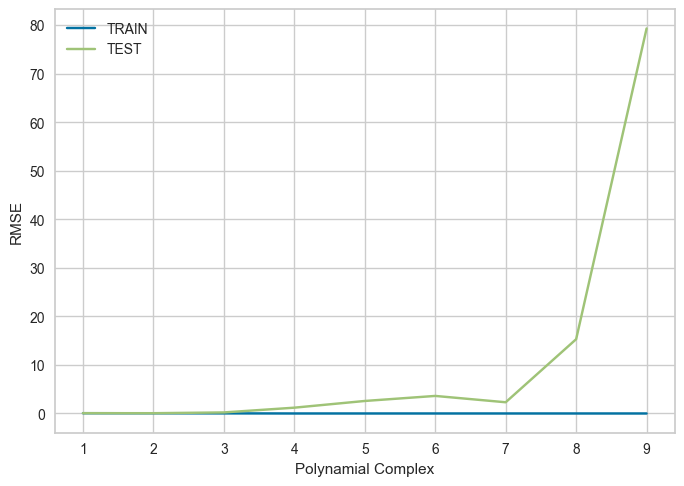

In [ ]:
# yukardaki sonucların grafigini çizelim ve patlama noktasını görelim
plt.plot(range(1,10), poly(10)["train_rmse_errors"], label = "TRAIN")
plt.plot(range(1,10), poly(10)["test_rmse_errors"], label = "TEST")
plt.xlabel("Polynamial Complex")
plt.ylabel("RMSE")
plt.legend();
plt.show()

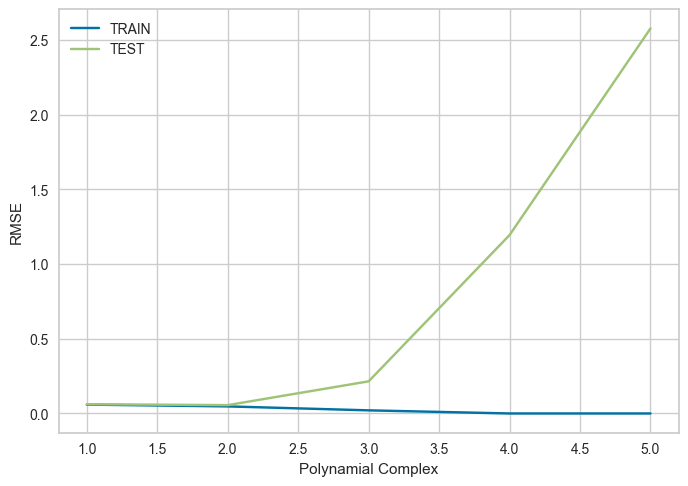

In [ ]:
# grafige daha yaakından bakalım
plt.plot(range(1,6), poly(6)["train_rmse_errors"], label = "TRAIN")
plt.plot(range(1,6), poly(6)["test_rmse_errors"], label = "TEST")
plt.xlabel("Polynamial Complex")
plt.ylabel("RMSE")
plt.legend();
plt.show()

In [76]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [77]:
scaler = MinMaxScaler()
scaler.fit_transform(X_train)

array([[0.5       , 1.        , 0.4       , ..., 1.        , 0.4       ,
        0.16      ],
       [0.31666667, 1.        , 0.7       , ..., 0.        , 0.        ,
        0.36      ],
       [0.3       , 1.        , 0.5       , ..., 0.        , 0.        ,
        0.16      ],
       ...,
       [0.96666667, 1.        , 0.7       , ..., 0.        , 0.        ,
        0.36      ],
       [0.7       , 1.        , 0.        , ..., 1.        , 0.6       ,
        0.36      ],
       [0.56666667, 1.        , 0.4       , ..., 0.        , 0.        ,
        0.        ]])

In [78]:
X_train_scaled= scaler.transform(X_train)
X_train_scaled

array([[0.5       , 1.        , 0.4       , ..., 1.        , 0.4       ,
        0.16      ],
       [0.31666667, 1.        , 0.7       , ..., 0.        , 0.        ,
        0.36      ],
       [0.3       , 1.        , 0.5       , ..., 0.        , 0.        ,
        0.16      ],
       ...,
       [0.96666667, 1.        , 0.7       , ..., 0.        , 0.        ,
        0.36      ],
       [0.7       , 1.        , 0.        , ..., 1.        , 0.6       ,
        0.36      ],
       [0.56666667, 1.        , 0.4       , ..., 0.        , 0.        ,
        0.        ]])

In [79]:
X_test_scaled= scaler.transform(X_test)
X_test_scaled

array([[0.65      , 1.        , 0.6       , ..., 0.        , 0.        ,
        0.        ],
       [0.56666667, 0.        , 0.6       , ..., 0.        , 0.        ,
        0.04      ],
       [0.18333333, 0.        , 0.8       , ..., 0.        , 0.        ,
        0.04      ],
       ...,
       [0.46666667, 1.        , 0.6       , ..., 0.        , 0.        ,
        0.36      ],
       [0.25      , 0.        , 0.4       , ..., 0.        , 0.        ,
        0.        ],
       [0.2       , 0.        , 0.6       , ..., 0.        , 0.        ,
        0.        ]])

In [80]:
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV

In [81]:
lasso_cv_model = LassoCV(alphas=np.linspace(0.1, 1.0, 100), cv=5, max_iter=10000, random_state=19)
lasso_cv_model.fit(X_train_scaled, y_train)

LassoCV(alphas=array([0.1       , 0.10909091, 0.11818182, 0.12727273, 0.13636364,
       0.14545455, 0.15454545, 0.16363636, 0.17272727, 0.18181818,
       0.19090909, 0.2       , 0.20909091, 0.21818182, 0.22727273,
       0.23636364, 0.24545455, 0.25454545, 0.26363636, 0.27272727,
       0.28181818, 0.29090909, 0.3       , 0.30909091, 0.31818182,
       0.32727273, 0.33636364, 0.34545455, 0.35454545, 0.36363636,
       0.37272727, 0.381818...
       0.69090909, 0.7       , 0.70909091, 0.71818182, 0.72727273,
       0.73636364, 0.74545455, 0.75454545, 0.76363636, 0.77272727,
       0.78181818, 0.79090909, 0.8       , 0.80909091, 0.81818182,
       0.82727273, 0.83636364, 0.84545455, 0.85454545, 0.86363636,
       0.87272727, 0.88181818, 0.89090909, 0.9       , 0.90909091,
       0.91818182, 0.92727273, 0.93636364, 0.94545455, 0.95454545,
       0.96363636, 0.97272727, 0.98181818, 0.99090909, 1.        ]),
        cv=5, max_iter=10000, random_state=19)

In [82]:

lasso_cv_model.alpha_

1.0

In [83]:
lasso_cv_model = LassoCV(alphas=np.linspace(0.1, 1, 100), cv=5, max_iter=10000, random_state=19)
lasso_cv_model.fit(X_train_scaled, y_train)

LassoCV(alphas=array([0.1       , 0.10909091, 0.11818182, 0.12727273, 0.13636364,
       0.14545455, 0.15454545, 0.16363636, 0.17272727, 0.18181818,
       0.19090909, 0.2       , 0.20909091, 0.21818182, 0.22727273,
       0.23636364, 0.24545455, 0.25454545, 0.26363636, 0.27272727,
       0.28181818, 0.29090909, 0.3       , 0.30909091, 0.31818182,
       0.32727273, 0.33636364, 0.34545455, 0.35454545, 0.36363636,
       0.37272727, 0.381818...
       0.69090909, 0.7       , 0.70909091, 0.71818182, 0.72727273,
       0.73636364, 0.74545455, 0.75454545, 0.76363636, 0.77272727,
       0.78181818, 0.79090909, 0.8       , 0.80909091, 0.81818182,
       0.82727273, 0.83636364, 0.84545455, 0.85454545, 0.86363636,
       0.87272727, 0.88181818, 0.89090909, 0.9       , 0.90909091,
       0.91818182, 0.92727273, 0.93636364, 0.94545455, 0.95454545,
       0.96363636, 0.97272727, 0.98181818, 0.99090909, 1.        ]),
        cv=5, max_iter=10000, random_state=19)

In [84]:

lasso_cv_model.alpha_

1.0

In [85]:
lasso_cv_model.coef_

array([ 0.,  0., -0.,  0.,  0., -0., -0.,  0., -0., -0.,  0.,  0.,  0.,
        0.,  0.,  0., -0., -0.,  0., -0., -0.,  0.,  0.,  0.,  0.,  0.,
       -0., -0.,  0., -0., -0.,  0., -0.,  0.,  0., -0., -0.,  0., -0.,
       -0.,  0.,  0.,  0., -0., -0.,  0., -0., -0.,  0.,  0., -0., -0.,
        0., -0.,  0.,  0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0.,  0., -0., -0.,  0., -0., -0., -0., -0., -0.,  0.])

In [87]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [88]:
from sklearn.model_selection import GridSearchCV
elastic_model = ElasticNet(max_iter=10000, random_state=42)
param_grid = {'alpha': [0.01, 0.012,0.2, 0.5, 0.6, 0.7, 1], 'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]}

In [89]:
grid_model = GridSearchCV(estimator= elastic_model,
                           param_grid=param_grid, 
                           scoring='neg_root_mean_squared_error',
                           cv=5, verbose=2)

In [90]:
grid_model.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.1s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.7; total time=   0.0s
[CV] END ...........................alpha=0.01,

GridSearchCV(cv=5, estimator=ElasticNet(max_iter=10000, random_state=42),
             param_grid={'alpha': [0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [91]:
grid_model.best_params_

{'alpha': 0.01, 'l1_ratio': 0.1}

In [92]:
y_pred = grid_model.predict(X_test_scaled)
y_train_pred = grid_model.predict(X_train_scaled)

In [94]:
final_scaler = StandardScaler()
X_scaled = final_scaler.fit_transform(poly_features)

In [95]:
final_model = Lasso(alpha = 0.01)

In [96]:
final_model.fit(X_scaled, y)

Lasso(alpha=0.01)